In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/Covid_19_Clean_Complete (1).csv")

In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.rename(columns={'Province/State':'State','Country/Region':'country'},inplace=True)

In [ ]:
df.Date.value_counts()

,count
Date,
2020-01-22,261
2020-05-30,261
2020-05-21,261
2020-05-22,261
2020-05-23,261
...,...
2020-03-26,261
2020-03-27,261
2020-03-28,261


In [ ]:
df['Date'].max()

'2020-07-27'

In [ ]:
top=df[df['Date']=='2020-07-27']
top

,State,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
top.groupby(by='country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

,country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
confirmed=df.groupby(by='Date')["Confirmed"].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


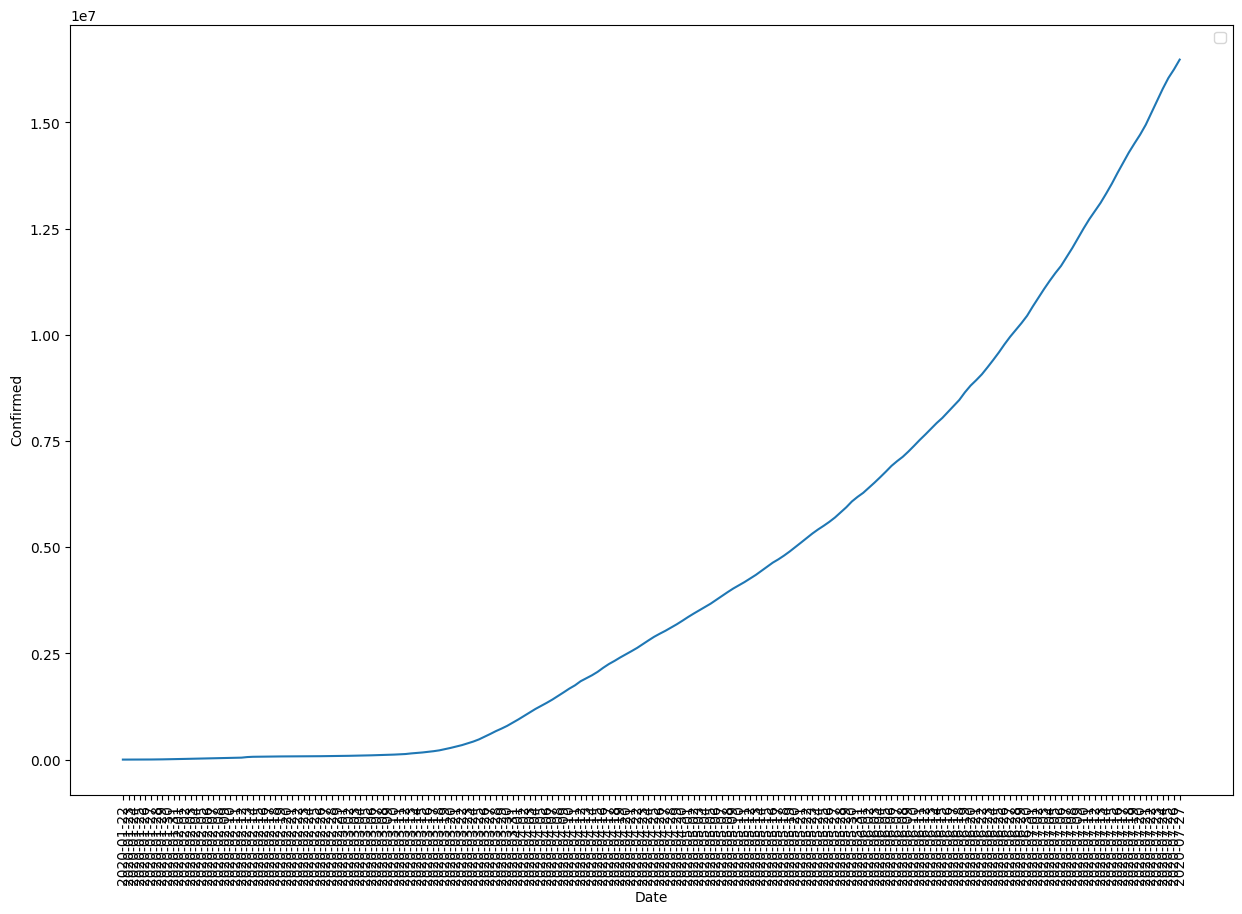

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Date',y='Confirmed',data=confirmed)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
top_10=df.groupby(by="country")['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()

In [ ]:
top_10

,country,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


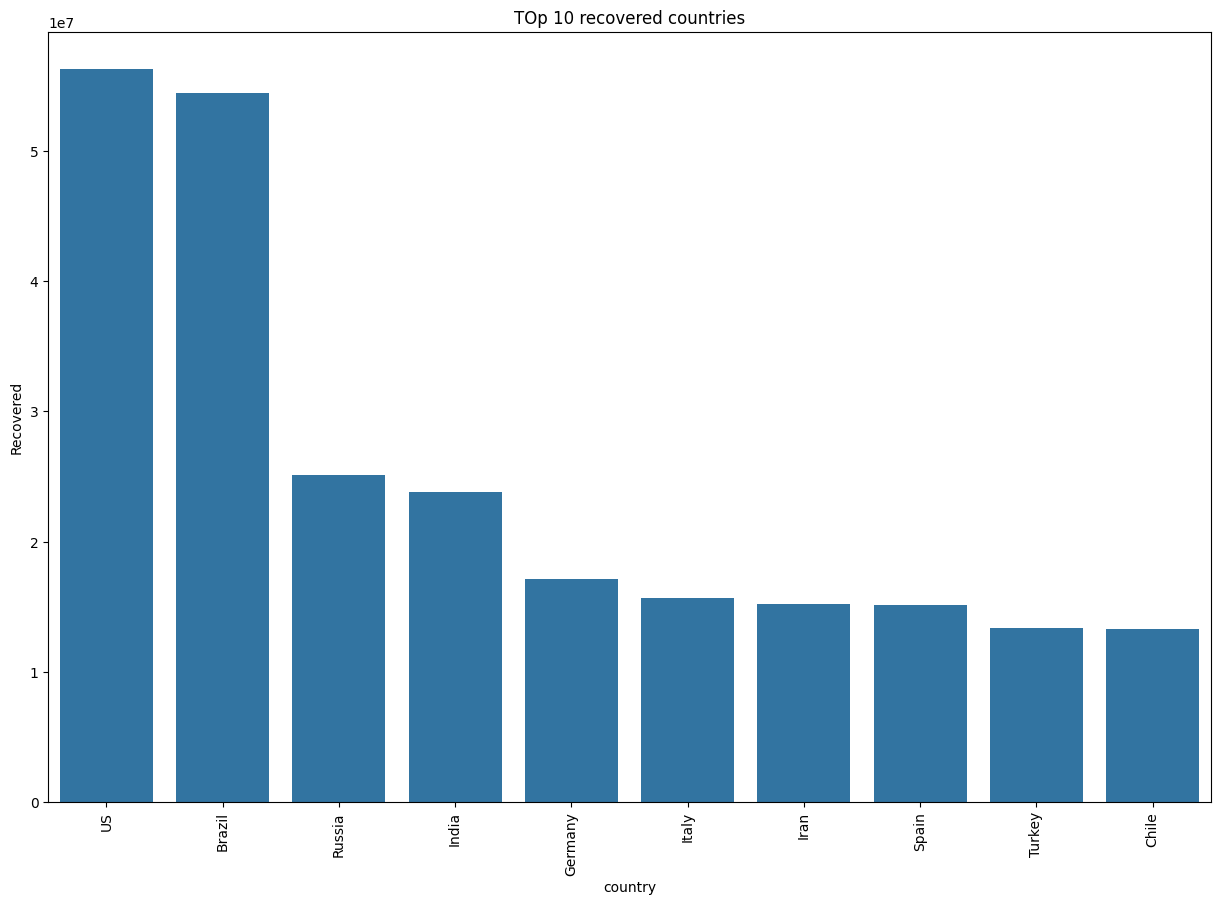

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='country',y='Recovered',data=top_10)
plt.title("TOp 10 recovered countries")
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_10_deaths=df.groupby(by='country')["Deaths"].sum().sort_values(ascending=False).head(10).reset_index()

In [ ]:
top_10_deaths

,country,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


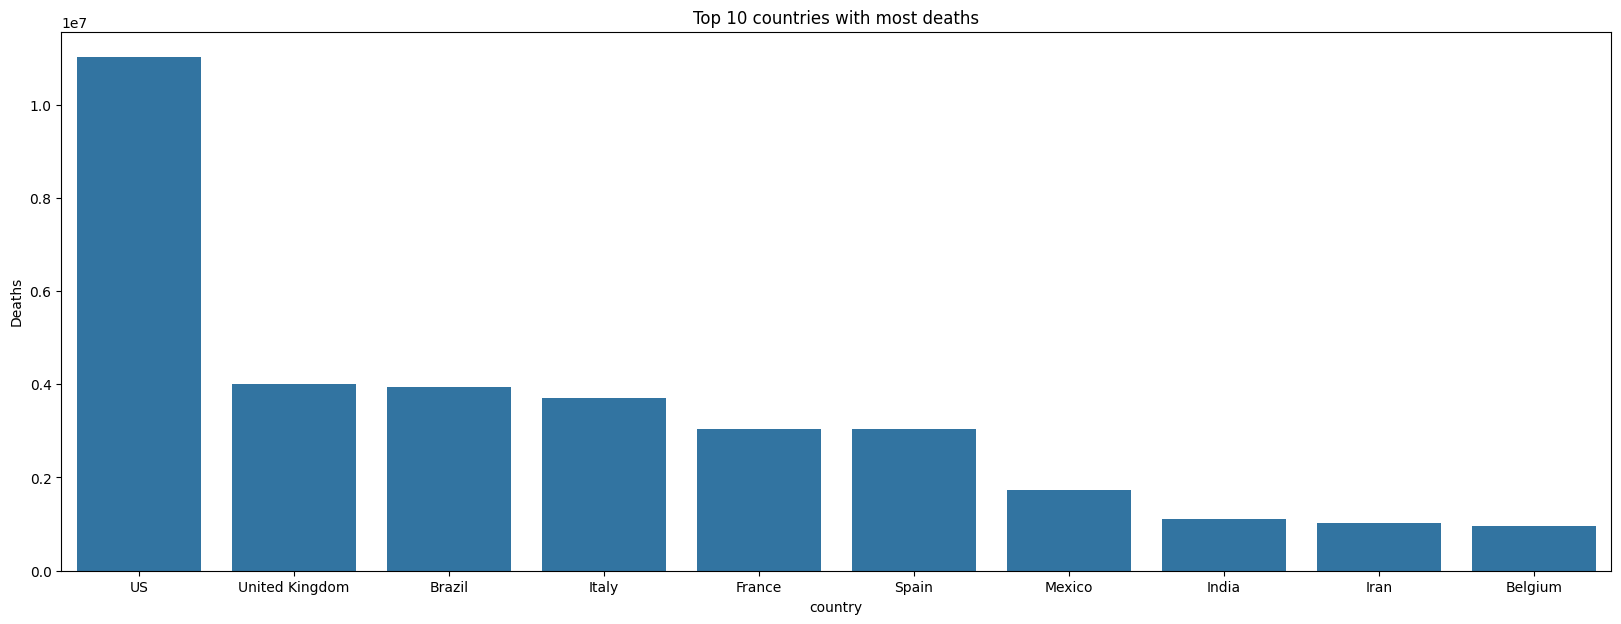

In [ ]:
plt.figure(figsize = (20,7))
sns.barplot(data = top_10_deaths, x = 'country', y = 'Deaths')
plt.title('Top 10 countries with most deaths')
plt.show()

In [ ]:
top_10_active=df.groupby(by='country')['Active'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_active

,country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


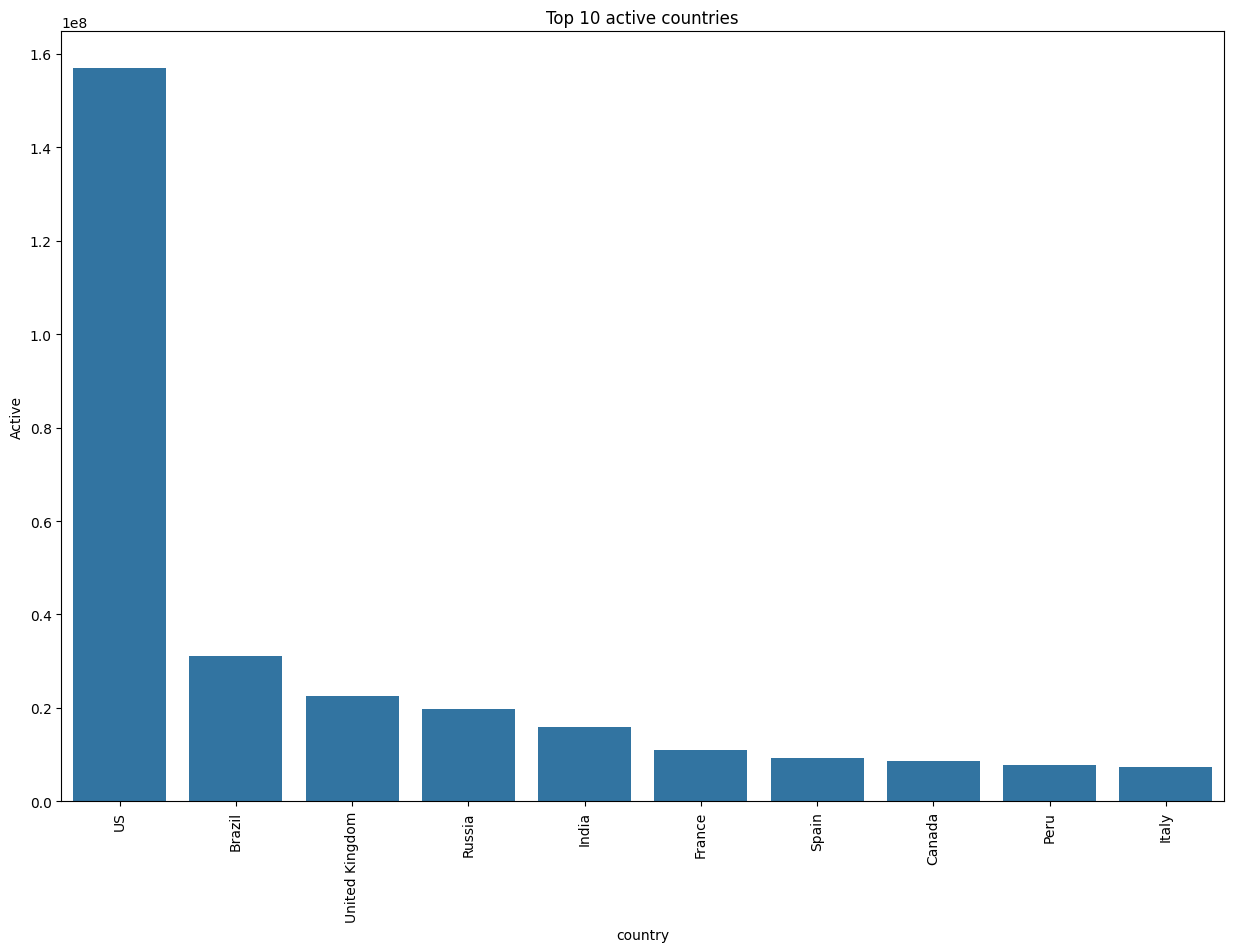

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='country',y='Active',data=top_10_active)
plt.title("Top 10 active countries")
plt.xticks(rotation=90)
plt.show()

In [ ]:
US = df[df['country'] == 'US']
US.head()

,State,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [ ]:
US=US.groupby(by='Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [ ]:
US

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [ ]:
China=df[df['country']=='China']
china=China.groupby(by='Date')[['Confirmed','Recovered','Active','Deaths']].sum().reset_index()

In [ ]:
china

,Date,Confirmed,Recovered,Active,Deaths
0,2020-01-22,548,28,503,17
1,2020-01-23,643,30,595,18
2,2020-01-24,920,36,858,26
3,2020-01-25,1406,39,1325,42
4,2020-01-26,2075,49,1970,56
...,...,...,...,...,...
183,2020-07-23,86045,78701,2695,4649
184,2020-07-24,86202,78745,2807,4650
185,2020-07-25,86381,78813,2916,4652
186,2020-07-26,86570,78862,3056,4652


In [ ]:
India=df[df['country']=='India']
india=India.groupby(by='Date')[['Confirmed','Recovered','Active','Deaths']].sum().reset_index()
india

,Date,Confirmed,Recovered,Active,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,817209,440298,30601
184,2020-07-24,1337024,849432,456234,31358
185,2020-07-25,1385635,885573,468002,32060
186,2020-07-26,1435616,917568,485277,32771


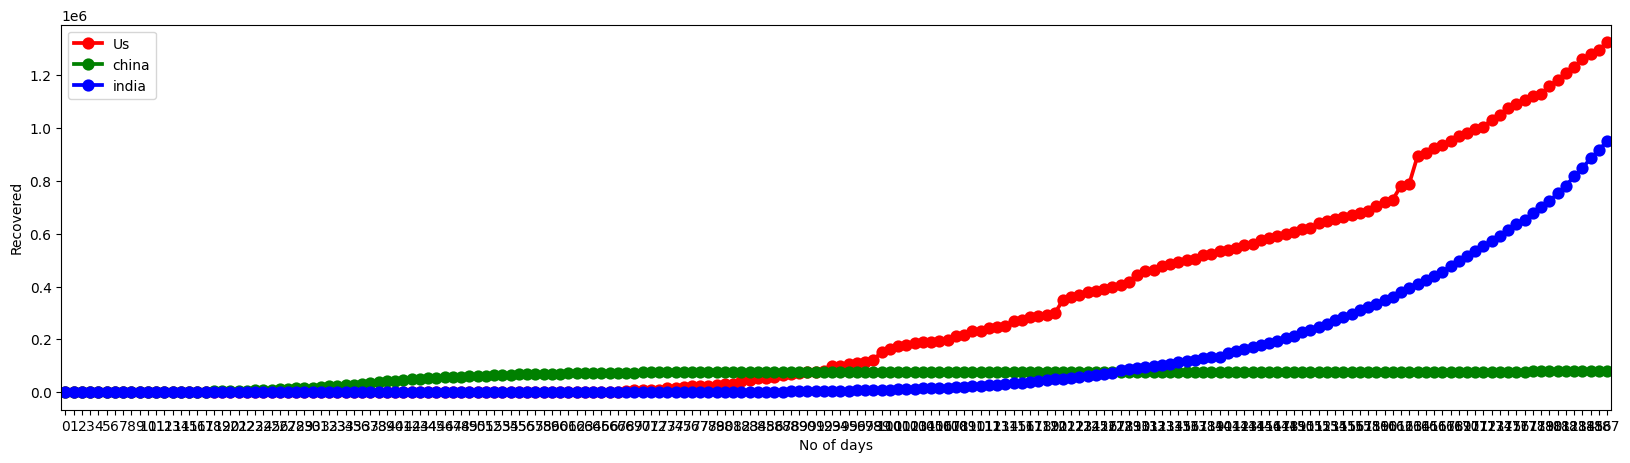

In [ ]:
plt.figure(figsize=(20,5))
sns.pointplot(x=US.index,y=US.Recovered,color='Red',label='Us')
sns.pointplot(x=china.index,y=china.Recovered,color='Green',label='china')
sns.pointplot(x=india.index,y=india.Recovered,color='Blue',label='india')
plt.xlabel('No of days',fontsize=10)
plt.ylabel('Recovered',fontsize=10)
plt.legend()
plt.show()


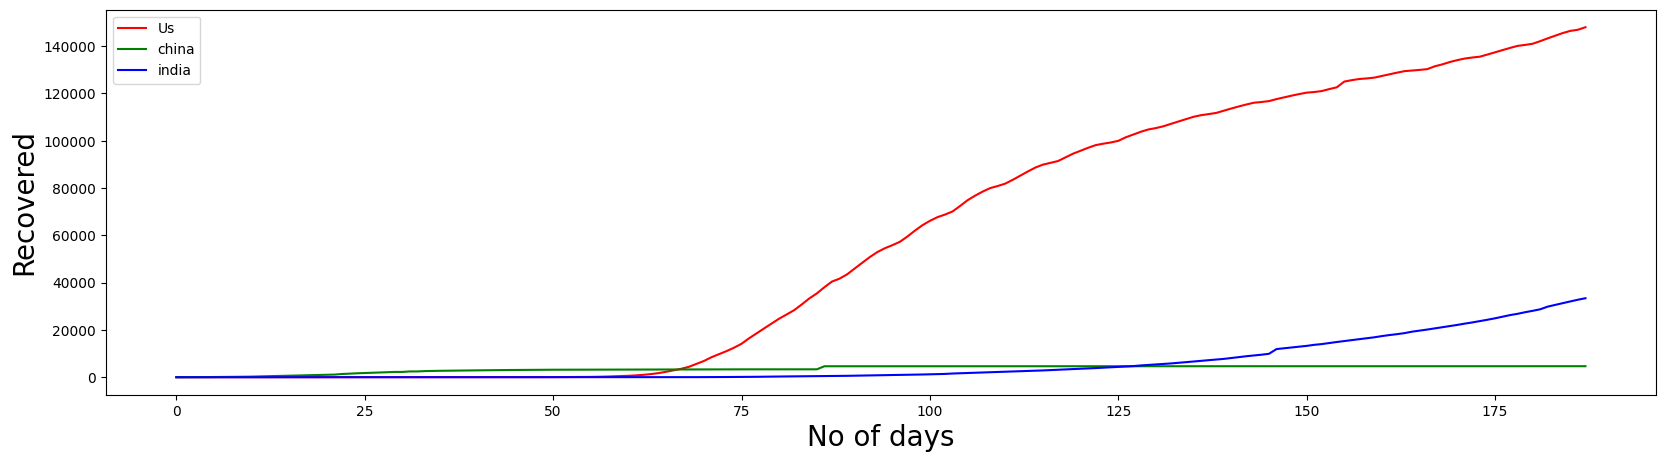

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x=US.index,y=US.Deaths,color='Red',label='Us')
sns.lineplot(x=china.index,y=china.Deaths,color='Green',label='china')
sns.lineplot(x=india.index,y=india.Deaths,color='Blue',label='india')
plt.xlabel('No of days',fontsize=20)
plt.ylabel('Recovered',fontsize=20)
plt.legend()
plt.show()

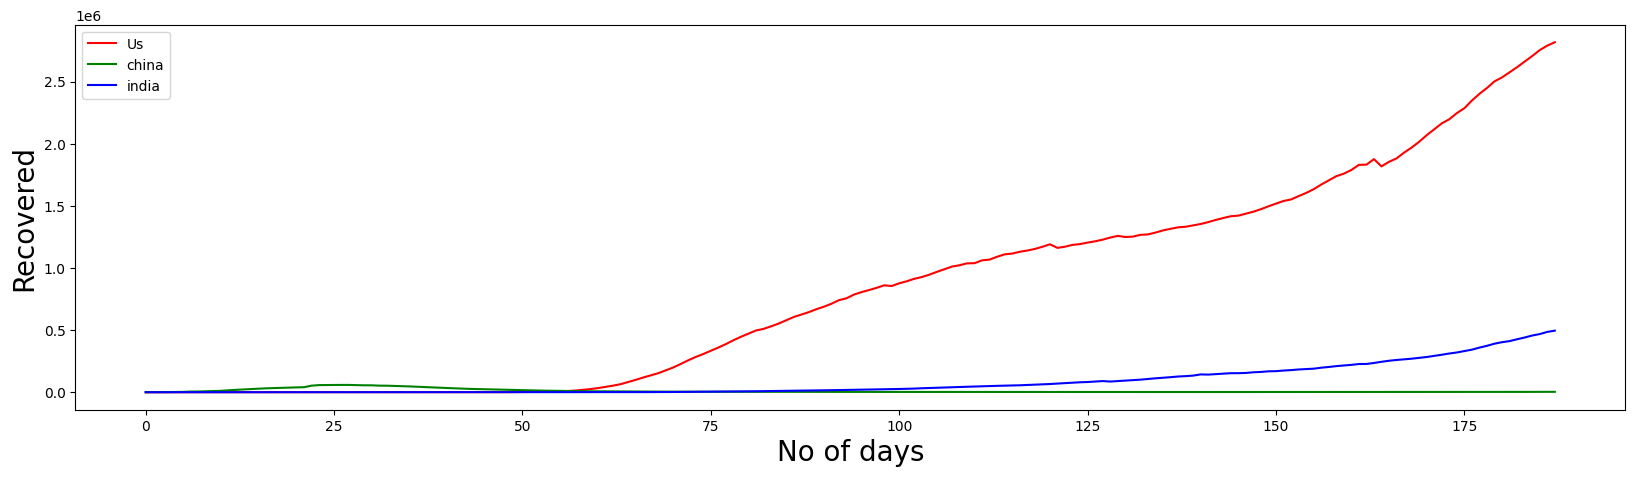

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x=US.index,y=US.Active,color='Red',label='Us')
sns.lineplot(x=china.index,y=china.Active,color='Green',label='china')
sns.lineplot(x=india.index,y=india.Active,color='Blue',label='india')
plt.xlabel('No of days',fontsize=20)
plt.ylabel('Recovered',fontsize=20)
plt.legend()
plt.show()

In [ ]:
!pip install prophet

In [ ]:
df1 = pd.read_csv('/content/Covid_19_Clean_Complete (1).csv', parse_dates=['Date'])
df1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       14664 non-null  object 
 1   country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   Date        49068 non-null  object 
 5   Confirmed   49068 non-null  int64  
 6   Deaths      49068 non-null  int64  
 7   Recovered   49068 non-null  int64  
 8   Active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
confirmed=df1.groupby(by='Date')["Confirmed"].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
deaths=df1.groupby(by='Date')["Deaths"].sum().reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
active=df1.groupby(by='Date')["Active"].sum().reset_index()
active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [ ]:
recovered=df1.groupby(by='Date')["Recovered"].sum().reset_index()
recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464
